In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
import numpy as np

from tqdm import tqdm_notebook
import imblearn

import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('private_pt.csv')

In [4]:
print('Attacker-Created Compromised Data set 1')
print('Size of the data set {}'.format(df.shape[0]))
print('Size of the Attacker-Created set {}'.format(df.loc[df.label==1].shape[0]))
print('Size of the Compromised set {}'.format(df.loc[df.label==0].shape[0]))

Attacker-Created Compromised Data set 1
Size of the data set 453
Size of the Attacker-Created set 280
Size of the Compromised set 173


In [5]:
df = df[['apex', 'domain_malicious', 'subdomain_malicious',
       '#total_scans', '#benign_scans', '#query', '#ip', '#ns', 'ns_matching',
       '#soa', 'soa_matching', 'label', 'positives', 'response_code',
       'rlength', 'url_after_redirects', 'url', 'suspicious_tld', 'length',
       'entropy', 'fake_tld', 'brand', 'pop_keywords', 'similar', 'is_idn',
       'minus', 'num_subdomains', 'mean_urls_per_subdomain',
       'mean_path_depth_per_subdomain',
       'mean_query_parameters_per_subdomain_paths',
       'mean_path_length_per_subdomain_paths',
       'mean_number_of_popular_keywords_per_subdomain_paths', 'url_length',
       '#query_parameters', '#dots_in_path', '#brands_in_path',
       '#similar_keywords_in_path', '#suspicious_keywords_in_path',
       'Alexa_Rank_Avg', 'Is_FQDN_In_Alexa_1Year']]

In [6]:
data = df

In [7]:
data['ns_matching'] = data['ns_matching'].replace(np.nan, None)
data['soa_matching'] = data['soa_matching'].replace(np.nan, None)
data = data.fillna(0)

In [8]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

data['suspicious_tld'] = label_encoder.fit_transform(data['suspicious_tld'])
data['response_code'] = label_encoder.fit_transform(data['response_code'])
data['ns_matching'] = label_encoder.fit_transform(data['ns_matching'])
data['soa_matching'] = label_encoder.fit_transform(data['soa_matching'])


data['response_code '] = label_encoder.fit_transform(data['response_code'])
data['url_after_redirects'] = label_encoder.fit_transform(data['url_after_redirects'])
data['is_idn'] = label_encoder.fit_transform(data['is_idn'])
data['Is_FQDN_In_Alexa_1Year'] = label_encoder.fit_transform(data['Is_FQDN_In_Alexa_1Year'])

data['domain_malicious'] = label_encoder.fit_transform(data['domain_malicious'])
data['subdomain_malicious'] = label_encoder.fit_transform(data['subdomain_malicious'])

In [9]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.1)

In [10]:
oversample = imblearn.over_sampling.SMOTE(k_neighbors=20)
X_train, Y_train = oversample.fit_resample(train[[
       'domain_malicious', 'subdomain_malicious',
       '#total_scans', '#benign_scans', '#ip', '#ns', 'ns_matching',
       '#soa', 'soa_matching', 'positives', 'response_code',
        'url_after_redirects', 'suspicious_tld', 'length',
       'entropy', 'fake_tld', 'brand', 'pop_keywords', 'similar', 'is_idn',
       'minus', 'num_subdomains', 'mean_urls_per_subdomain',
       'mean_path_depth_per_subdomain',
       'mean_query_parameters_per_subdomain_paths',
       'mean_path_length_per_subdomain_paths',
       'mean_number_of_popular_keywords_per_subdomain_paths', 'url_length',
       '#query_parameters', '#dots_in_path', '#brands_in_path',
       '#similar_keywords_in_path', '#suspicious_keywords_in_path',
       'Alexa_Rank_Avg', 'Is_FQDN_In_Alexa_1Year'
]
], train.label)

In [11]:
X_test = test[['domain_malicious', 'subdomain_malicious',
       '#total_scans', '#benign_scans', '#ip', '#ns', 'ns_matching',
       '#soa', 'soa_matching', 'positives', 'response_code',
        'url_after_redirects', 'suspicious_tld', 'length',
       'entropy', 'fake_tld', 'brand', 'pop_keywords', 'similar', 'is_idn',
       'minus', 'num_subdomains', 'mean_urls_per_subdomain',
       'mean_path_depth_per_subdomain',
       'mean_query_parameters_per_subdomain_paths',
       'mean_path_length_per_subdomain_paths',
       'mean_number_of_popular_keywords_per_subdomain_paths', 'url_length',
       '#query_parameters', '#dots_in_path', '#brands_in_path',
       '#similar_keywords_in_path', '#suspicious_keywords_in_path',
       'Alexa_Rank_Avg', 'Is_FQDN_In_Alexa_1Year']]

Y_test = test.label


In [12]:
classifiers=[['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Support Vector Classification :',SVC()],
       ['RandomForestClassifier : ',RandomForestClassifier()],      
      ]
cla_pred=[]
for name,model in classifiers:
    model=model
    model.fit(X_train,Y_train)
    predictions = model.predict(X_test)
    cla_pred.append(accuracy_score(Y_test,predictions))
    print(name,accuracy_score(Y_test,predictions),' precision : ',precision_score(Y_test,predictions),' recall : ',recall_score(Y_test,predictions))

Logistic Regression : 0.7391304347826086  precision :  0.7916666666666666  recall :  0.7307692307692307
Decision Tree Classification : 0.8043478260869565  precision :  0.8148148148148148  recall :  0.8461538461538461
Gradient Boosting Classification : 0.8695652173913043  precision :  0.9545454545454546  recall :  0.8076923076923077
Ada Boosting Classification : 0.8695652173913043  precision :  0.8846153846153846  recall :  0.8846153846153846
Extra Tree Classification : 0.8478260869565217  precision :  0.88  recall :  0.8461538461538461
K-Neighbors Classification : 0.782608695652174  precision :  0.8076923076923077  recall :  0.8076923076923077
Support Vector Classification : 0.782608695652174  precision :  0.7666666666666667  recall :  0.8846153846153846
RandomForestClassifier :  0.8913043478260869  precision :  0.9565217391304348  recall :  0.8461538461538461


In [13]:
RFC = RandomForestClassifier()

In [14]:
from sklearn.model_selection import GridSearchCV

n_estimators = list(range(1,1001,100))
max_depth = list(range(1,1001,100))

hyperparameters = dict(max_depth=max_depth, n_estimators=n_estimators)
h_rfmodel = GridSearchCV(RFC, hyperparameters, cv=5,n_jobs=100, verbose=1)

best_logmodel=h_rfmodel.fit(X_train,Y_train)

n_estimators = best_logmodel.best_estimator_.get_params()['n_estimators']
max_depth = best_logmodel.best_estimator_.get_params()['max_depth']

print('Best Estimators:', n_estimators)
print('Best Max Depth:', max_depth)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=100)]: Using backend LokyBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done 250 tasks      | elapsed:   12.4s
[Parallel(n_jobs=100)]: Done 500 out of 500 | elapsed:   19.6s finished


Best Estimators: 801
Best Max Depth: 201


In [15]:
RFC = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators)
RFC.fit(X_train,Y_train)
predictions_RFC = RFC.predict(X_test)

In [16]:
print('Random Forest',accuracy_score(Y_test,predictions_RFC),' precision : ',precision_score(Y_test,predictions_RFC),' recall : ',recall_score(Y_test,predictions_RFC),'\n')
print(classification_report(Y_test,predictions_RFC))

Random Forest 0.8913043478260869  precision :  0.9565217391304348  recall :  0.8461538461538461 

              precision    recall  f1-score   support

           0       0.83      0.95      0.88        20
           1       0.96      0.85      0.90        26

    accuracy                           0.89        46
   macro avg       0.89      0.90      0.89        46
weighted avg       0.90      0.89      0.89        46



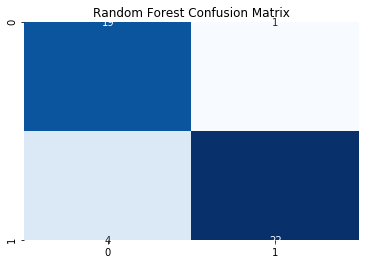

In [17]:
plt.title("Random Forest Confusion Matrix")
sns.heatmap(confusion_matrix(Y_test, predictions_RFC),annot=True,cmap="Blues",fmt="g",cbar=False)
# plt.savefig('attacker_created_compromised_classifier_confusion_matrix_gt1.png')
plt.show()

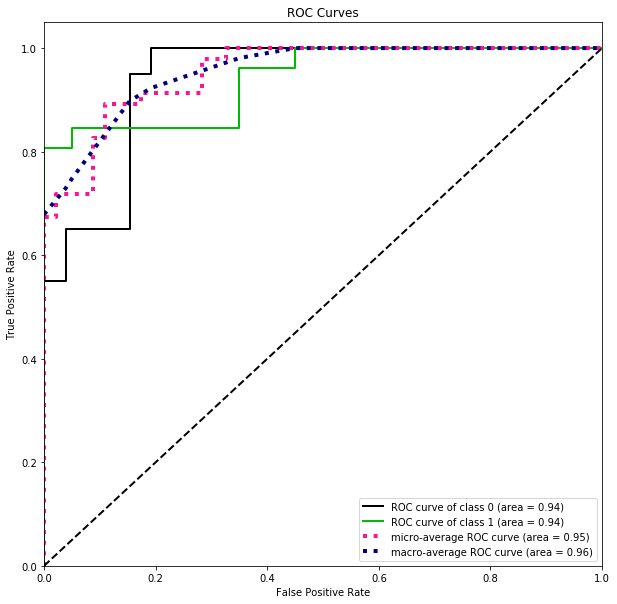

In [18]:
false_positive_rate_RFC, true_positive_rate_RFC, thresholds_RFC = roc_curve(Y_test,RFC.predict_proba(X_test)[:,1])
skplt.metrics.plot_roc_curve(Y_test.values,RFC.predict_proba(X_test), figsize = (10,10))
# plt.savefig('attacker_created_compromised_classifier_roc_gt1.png')
plt.show()

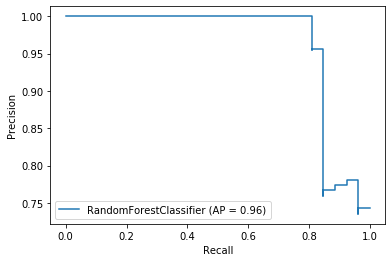

In [19]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(RFC, X_test, Y_test)
# plt.savefig('attacker_created_compromised_classifier_precision_recall_curve_gt1.png')

Feature ranking:
1. feature 4 - #ip (0.11793842823052751)
2. feature 23 - mean_path_depth_per_subdomain (0.11750210144146941)
3. feature 25 - mean_path_length_per_subdomain_paths (0.0997842667792439)
4. feature 7 - #soa (0.06235202568574207)
5. feature 33 - Alexa_Rank_Avg (0.06180594654699116)
6. feature 2 - #total_scans (0.05951199258476261)
7. feature 3 - #benign_scans (0.0564266210912646)
8. feature 5 - #ns (0.04969300987988729)
9. feature 22 - mean_urls_per_subdomain (0.04160673825485256)
10. feature 14 - entropy (0.04081458278675435)
11. feature 13 - length (0.0392385658147033)
12. feature 27 - url_length (0.038292887361441055)
13. feature 11 - url_after_redirects (0.033587134322962994)
14. feature 10 - response_code (0.03220227481585346)
15. feature 21 - num_subdomains (0.026299879508385)
16. feature 29 - #dots_in_path (0.02411818362027773)
17. feature 9 - positives (0.023211173865962414)
18. feature 20 - minus (0.02167366268866448)
19. feature 24 - mean_query_parameters_per_subd

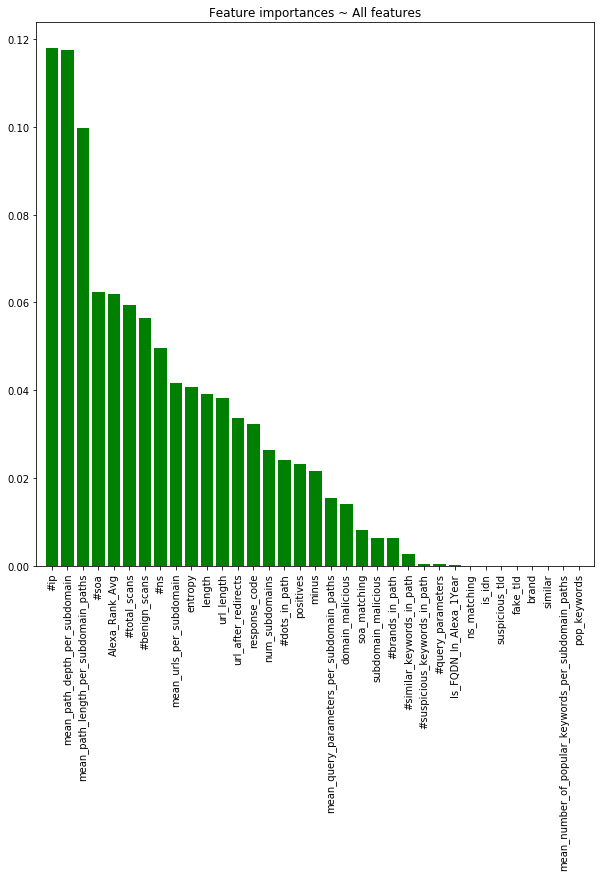

In [20]:
import numpy as np
importances = RFC.feature_importances_
std = np.std([RFC.feature_importances_ for tree in RFC.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
Feature = [
             'domain_malicious', 'subdomain_malicious',
       '#total_scans', '#benign_scans', '#ip', '#ns', 'ns_matching',
       '#soa', 'soa_matching', 'positives', 'response_code',
        'url_after_redirects', 'suspicious_tld', 'length',
       'entropy', 'fake_tld', 'brand', 'pop_keywords', 'similar', 'is_idn',
       'minus', 'num_subdomains', 'mean_urls_per_subdomain',
       'mean_path_depth_per_subdomain',
       'mean_query_parameters_per_subdomain_paths',
       'mean_path_length_per_subdomain_paths',
       'mean_number_of_popular_keywords_per_subdomain_paths', 'url_length',
       '#query_parameters', '#dots_in_path', '#brands_in_path',
       '#similar_keywords_in_path', '#suspicious_keywords_in_path',
       'Alexa_Rank_Avg', 'Is_FQDN_In_Alexa_1Year'
]
for f in range(X_train.shape[1]):
    print("{}. feature {} - {} ({})" .format(f + 1, indices[f], Feature[indices[f]], importances[indices[f]]))
indiceX = [Feature[i] for i in indices]
plt.figure(figsize=(10,10))
plt.title("Feature importances ~ All features")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indiceX, rotation=90)
plt.xlim([-1, X_train.shape[1]])
# plt.savefig('attacker_created_compromised_classifier_feature_importances_gt1.png')
plt.show()

In [21]:
import pickle
# pickle.dump(RFC,open('attacker_created_compromised_classifier_rf_gt_2_priv.pickle','wb'))